In [1]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import odf
import math
import pdfkit
import itertools
from scipy.stats import linregress
from scipy.integrate import simps
import scipy.constants as const
from itertools import chain
from statistics import mean
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.umath import *
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, minimize_scalar
from lmfit.models import LorentzianModel
from IPython.display import display, Latex
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
B_correct =  -0.4 #mT
d_start = 46.5
# B values in mT
# all values of B in minus
# higher fluctuations in B for centered position

In [2]:
d = np.arange(46.5, 86, 5)
I_1 = [0, 0.51, 1.01, 1.51, 2.02, 2.53, 3.01, 3.54, 4.04]
B = [[0.3, 0.5, 1.1, 1.4, 1.4, 1.3, 0.7, 0.3], 
     [1.6, 7.3, 26.5, 33.7, 33.9, 31.4, 14.2, 2.9],
     [2.1, 13.0, 53.5, 66.0, 65.0, 62.8, 25, 5.1],
     [3.2, 19.5, 78.2, 102, 101, 92, 38, 7.5],
     [4, 29.1, 113, 134, 133.5, 124, 50.7, 10.4],
     [5.2, 38.3, 139.4, 167, 166.5, 150.3, 60.1, 11.9],
     [7.3, 41.8, 157.5, 192.5, 193.7, 175.4, 72.4, 14.7],
     [9.7, 47.6, 174.7, 214.4, 215.5, 198.0, 74.1, 12.7],
     [7.6, 58.0, 183.7, 231, 230.7, 214.2, 76.4, 12.0]
    ]
# C = []
# for i in range(len(B)):
#     for j in range(len(B[0])):
#         C.append(B[i][j])
# D = list(itertools.chain.from_iterable(itertools.repeat(x, len(B[0])) for x in I_1))

In [3]:
# ib = pd.DataFrame({'I': D, 'B': C})
# ib

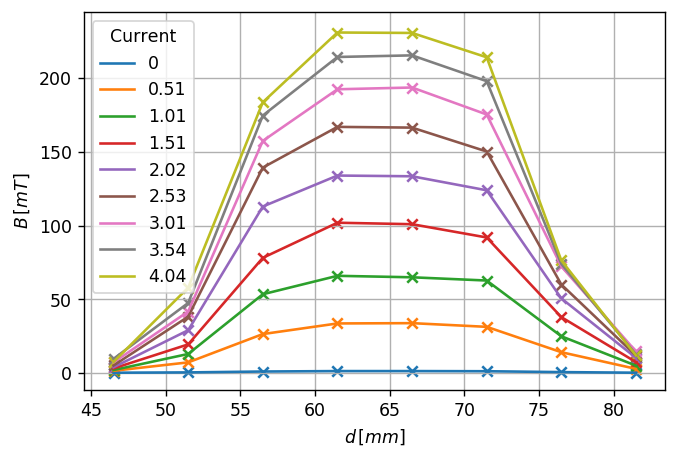

In [4]:
plt.figure(dpi=125)
for i in range(9):
    plt.plot(d, B[i][:])
    plt.scatter(d, B[i][:], marker='x')
plt.legend([i for i in I_1], title="Current")
plt.xlabel('$d \, [mm]$')
plt.ylabel('$B  \, [mT]$')
plt.grid()
plt.show()

In [5]:
mean_flux_density = []
for i in range(9):
    integrate = simps(B[i][:], d)
    mean = integrate/(d[len(d)-1] - d[0])
    mean_flux_density.append(mean)

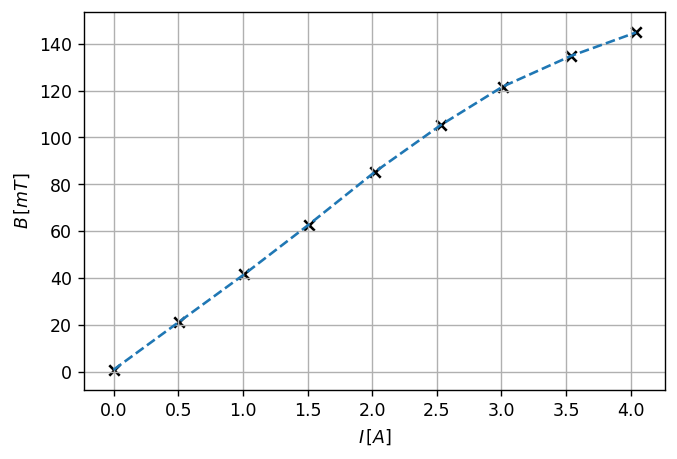

In [6]:
plt.figure(dpi=125)
plt.plot(I_1, mean_flux_density, ls='--')
plt.scatter(I_1, mean_flux_density, marker='x', color='black')
plt.xlabel('$I \, [A]$')
plt.ylabel('$B \, [mT]$')
plt.grid()
plt.show()

In [7]:
# current values drop by around 0.05 - 0.1 A for larger values
wavelength = [595, 580, 525, 505, 440] 
I_2 = [[0.50, 1.00, 1.51, 2.03, 2.51, 3.02, 3.52, 3.99],
     [0.49, 1.00, 1.48, 1.96, 2.54, 3.00, 3.46, 3.91],
     [0.51, 1.01, 1.52, 2.04, 2.49, 2.90, 3.48, 3.92],
     [0.47, 0.99, 1.48, 2.12, 2.50, 2.94, 3.42, 3.98],
     [0.45, 1.07, 1.52, 2.05, 2.45, 2.94, 3.48, 3.93],
    ]
# values less than least count !?
angle1 = [[43.5, 42.5, 42, 41.5, 41, 40, 40, 39],
         [43.5, 43, 41.5, 41, 40, 39.5, 39, 38.5],
          [43.5, 43, 41, 40, 39, 37, 37.5, 37],
          [43.5, 42.5, 41, 39.5, 39, 38, 37, 37],
          [42.5, 41, 39.5, 37, 36, 35, 34, 31.5]
        ] # Position 1
angle2 = [[45, 46, 46.5, 47.5, 48, 48, 49, 50],
          [45, 46.5, 47, 48, 49, 49.5, 50, 50],
          [46, 46.5, 48, 49.5, 50, 51, 52, 52],
          [45, 46, 48, 50, 50, 51, 51, 52.5],
          [46.5, 48.5, 50, 52.5, 53, 55, 56.5, 57]
         ]# Position 2 ie polarity of current changed

In [8]:
# Interpolation work
interpolation_arr = []
for i in range(len(wavelength)):
    interpolation = np.interp(I_2[i][:], I_1, mean_flux_density)
    interpolation_arr.append(interpolation)
interpolation_arr

[array([ 21.12068161,  41.23580952,  62.85      ,  85.67065826,
        104.49082633, 121.95932165, 134.33016622, 143.7725    ]),
 array([ 20.71755369,  41.23580952,  61.57728571,  82.63991597,
        105.61743552, 121.36946925, 132.84566487, 142.18183333]),
 array([ 21.52380952,  41.63809524,  63.28977591,  86.0627451 ,
        103.70665266, 117.94511409, 133.34049865, 142.38066667]),
 array([ 19.91129785,  40.83352381,  61.57728571,  89.19943978,
        104.0987395 , 119.31485615, 131.8559973 , 143.57366667]),
 array([ 19.10504202,  44.18352381,  63.28977591,  86.45483193,
        102.13830532, 119.31485615, 133.34049865, 142.5795    ])]

In [9]:
angle_rotation = []
for i in range(len(I_2)):
    angle_ = (np.array(angle2[i][:]) - np.array(angle1[i][:]))
    angle_rotation.append(angle_)
angle_rotation

[array([ 1.5,  3.5,  4.5,  6. ,  7. ,  8. ,  9. , 11. ]),
 array([ 1.5,  3.5,  5.5,  7. ,  9. , 10. , 11. , 11.5]),
 array([ 2.5,  3.5,  7. ,  9.5, 11. , 14. , 14.5, 15. ]),
 array([ 1.5,  3.5,  7. , 10.5, 11. , 13. , 14. , 15.5]),
 array([ 4. ,  7.5, 10.5, 15.5, 17. , 20. , 22.5, 25.5])]

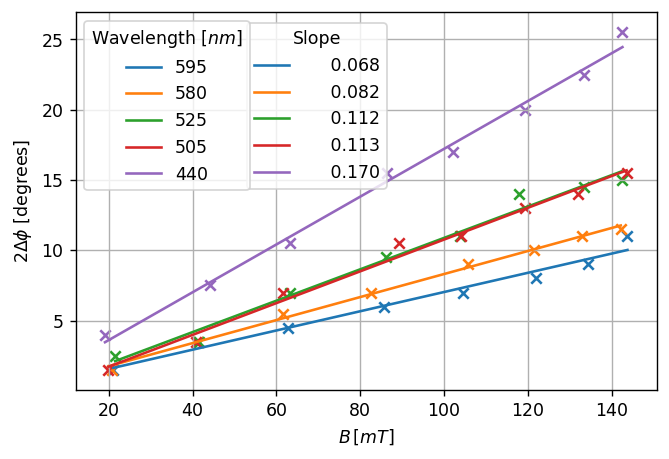

In [10]:
verdict_const_arr = []
slopes = []
fitted_y = []
fitted_y_prime = []
for i in range(len(wavelength)):
    y = angle_rotation[i]
    x_prime = wavelength[i]
    x = interpolation_arr[i]
    X = np.array(x).reshape(-1, 1)
    Y = np.array(y).reshape(-1, 1)
    reg = LinearRegression().fit(X, Y)
    intercept = reg.intercept_
    coef = reg.coef_
    slopes.append('{:10.3f}'.format(coef[0, 0]))
    reg_value = reg.score(X, Y)
    verdict_const = (coef[0, 0]/(2 * 0.03)) * 1000
    verdict_const_arr.append(verdict_const)
    fitted_y.append((coef[0, 0]*interpolation_arr[i]) + intercept[0])
    
# for i in range(len(wavelength)):
#     x_prime = wavelength
#     y_prime = verdict_const_arr
#     X = np.array(x_prime).reshape(-1, 1)
#     Y = np.array(y_prime).reshape(-1, 1)
#     reg = LinearRegression().fit(X, Y)
#     intercept = reg.intercept_
#     coef = reg.coef_
#     reg_value = reg.score(X, Y)
#     fitted_y_prime.append(coef[0, 0]*wavelength[i] + intercept[0])
plt.figure(dpi=125)
plt.plot(interpolation_arr[0][:], fitted_y[0][:], 
         interpolation_arr[1][:], fitted_y[1][:],
         interpolation_arr[2][:], fitted_y[2][:],
         interpolation_arr[3][:], fitted_y[3][:],
         interpolation_arr[4][:], fitted_y[4][:])
plt.scatter(interpolation_arr[0][:], angle_rotation[0][:],marker='x')
plt.scatter(interpolation_arr[1][:], angle_rotation[1][:],marker='x')
plt.scatter(interpolation_arr[2][:], angle_rotation[2][:],marker='x')
plt.scatter(interpolation_arr[3][:], angle_rotation[3][:],marker='x')
plt.scatter(interpolation_arr[4][:], angle_rotation[4][:],marker='x')

legend1 = plt.legend(slopes, bbox_to_anchor=(0.55,0.51),title='Slope')
plt.gca().add_artist(legend1)
plt.legend([595, 580, 525, 505, 440], title="Wavelength $[nm]$")
plt.xlabel('$B \, [mT]$')
plt.ylabel('$2\Delta \phi$ [degrees]')
plt.grid()
plt.show()

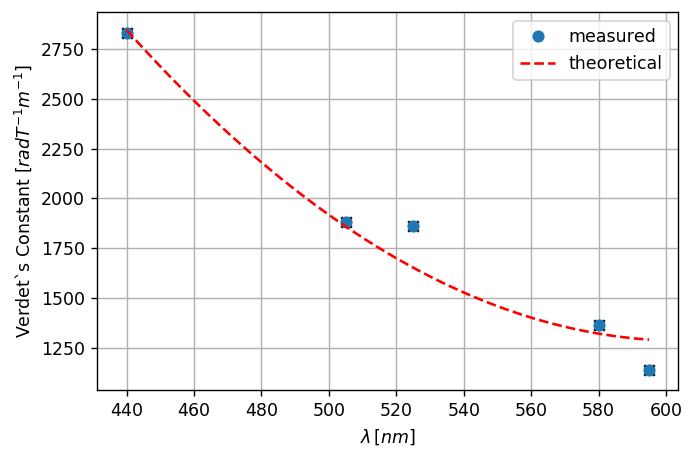

In [11]:
def linelikeexcel(x,y):
    coefs = np.polyfit(x,y,deg=2)
    p_obj = np.poly1d(coefs)
    return p_obj

theoretical = [1210, 1428, 1647, 1825, 2857]

p_objt = linelikeexcel(np.array(wavelength), np.array(theoretical))

x_line = np.linspace(min(np.array(wavelength)), max(np.array(wavelength)), 100)
y_linet = p_objt(x_line)

plt.figure(dpi=125)
plt.plot(wavelength, verdict_const_arr, 'o', label="measured")
plt.plot(x_line,y_linet, 'r--', label="theoretical")
plt.legend()
plt.scatter(wavelength, verdict_const_arr, marker='x', color='black')
plt.xlabel('$\lambda \, [nm]$')
plt.ylabel('Verdet`s Constant $[radT^{-1}m^{-1}]$')
plt.grid()

In [12]:
verdict_const_arr

[1139.013495856664,
 1364.230019377424,
 1860.5910477692935,
 1882.5298685880311,
 2832.92947077062]

In [13]:
er_ = []
dev_ = []
for i in range(len(wavelength)):
    if i != 2:
        th = np.interp(list(reversed(wavelength))[i], list(reversed(wavelength)), list(reversed(theoretical)))
        me = list(reversed(verdict_const_arr))[i]
        er = np.abs(me - th)
        dev = (er/me)*100
        er_.append(er)
        dev_.append(dev)
er_
mean_er = np.mean(er_)
mean_dev = np.mean(dev_)
mean_dev

3.7030914834536377

## Kerr Effect

In [14]:
background = 0.01
amplification = 10
maximum = 1.85 # in V
final_background = 0.06

In [15]:
# slight fluctuations were observed
#58, 96, 209, 300, 405, 459, 500
#0, 0.01, 0
# dimension of these two arrays where found to be 26 and 25 at certain point in time, 870 891  1.78 1.77
voltage = [459, 500,536, 576, 616, 646, 679, 705, 736, 762, 795, 830, 870, 891, 916, 945, 980, 1009, 1030, 1054, 1089, 1125]#, 1160]
intensity = [0, 0, 0.04, 0.09, 0.18, 0.31, 0.43, 0.61, 0.81, 1.07, 1.28, 1.46, 1.67, 1.78, 1.73, 1.61, 1.41, 1.17, 0.96, 0.71, 0.39, 0.15]#, 0.15]
print(len(voltage), len(intensity))
print(intensity[17])

22 22
1.17


1.2434521253850602e-09
167246.05212203896


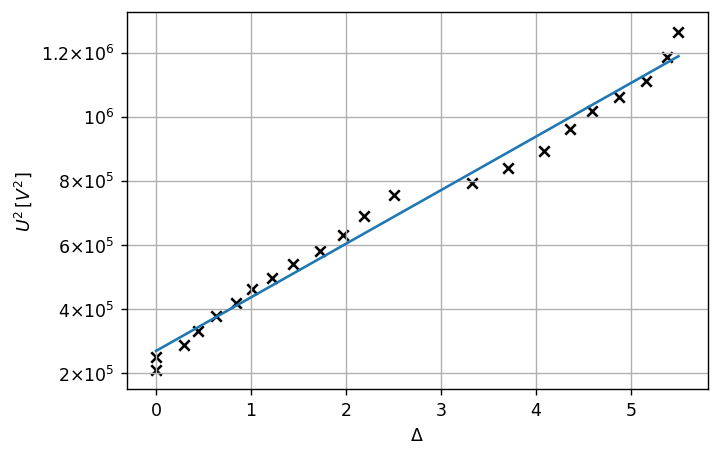

33600.03281597248
168943.79389290075


In [51]:
voltage_sq = [i**2 for i in voltage]
phase_shift_arr = []
for i in range(len(intensity)):
    phase_shift = 2 * np.arcsin(np.sqrt(intensity[i]/maximum))
    phase_shift_arr.append(phase_shift)
phase_shift_correct = phase_shift_arr[:phase_shift_arr.index(max(phase_shift_arr))]
correct_fact = np.array(phase_shift_arr[phase_shift_arr.index(max(phase_shift_arr)):]) + max(phase_shift_arr)
correct_copy = correct_fact.copy()


for i in range(len(correct_fact)):    
    phase_shift_correct.append(correct_copy[i])

correct_ = sorted(phase_shift_correct)


X = np.array(correct_).reshape(-1, 1)
Y = np.array(voltage_sq).reshape(-1, 1)

reg = LinearRegression().fit(X, Y)
intercept = reg.intercept_
coef = reg.coef_
reg_value = reg.score(X, Y)

def projected(X):
    return coef[0, 0]*X + intercept[0]

d = 0.0014
l = 0.0015
kerr = (d**2)/(2*(np.pi)*coef[0, 0]*l)
print(kerr)
print(coef[0, 0])
plt.figure(dpi=125)
plt.plot(X, projected(X))
plt.scatter(X, Y, marker='x', color='black')


# print(phase_shift_arr)
# print(phase_shift_arr.index(2.722635102413922))
plt.xlabel('$\Delta $')
plt.ylabel('$U^{2} \, [V^{2}]$')
import matplotlib.ticker as mticker
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.grid()
plt.savefig('phase_shift.png')
plt.show()
# error = np.sqrt((1/(len(voltage) - 2)) * (1 - ((reg_value) ** 2))/((reg_value) ** 2)) * coef[0, 0]
# print(error)
# print((np.sum((np.array(voltage_sq) - (coef[0, 0] * np.array(correct_)))**2)))
print((1/(len(voltage) - 1)) * (np.sum(np.array(np.rad2deg(correct_))**2)))
merr = (1/(((len(voltage) - 1)) * (np.sum(np.array((correct_))**2)))) * (np.sum((np.array(projected(X)) - (coef[0, 0] * np.array((correct_))))**2))
merr
print(np.sqrt(np.abs(merr)))

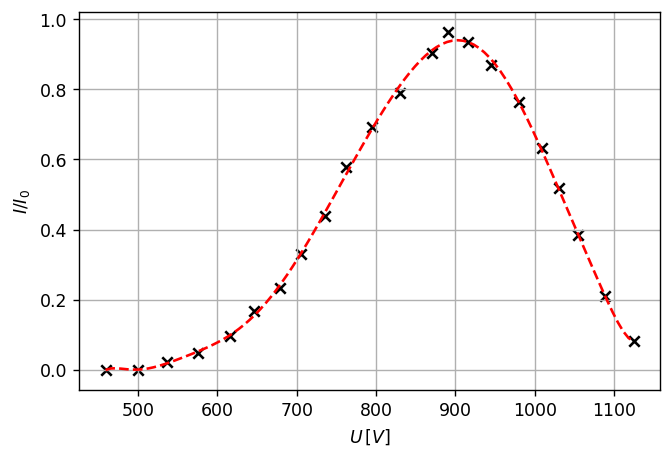

In [17]:
# normalized = np.array(intensity)/maximum
# x = voltage
# plt.scatter(x, normalized, marker='x', color='black')
normalized = np.array(intensity)/maximum
def linelikeexcel(x,y):
    coefs = np.polyfit(x,y,deg=11)
    p_obj = np.poly1d(coefs)
    return p_obj

p_objt = linelikeexcel(np.array(voltage), np.array(normalized))

x_line = np.linspace(min(np.array(voltage)), max(np.array(voltage)), 100)
y_linet = p_objt(x_line)

plt.figure(dpi=125)
plt.scatter(np.array(voltage), np.array(normalized), marker='x', color='black')
plt.plot(x_line,y_linet, 'r--')
plt.xlabel('$U \, [V]$')
plt.ylabel('$I/I_0$')
plt.grid()
plt.show()